# <center> <div style="width: 370px;"> ![Inear Sorting](pictures/Inear_Sorting.jpg)

# <center>Linear Sorting

### Comparison-Based Sorting


In our previous discussion, we established a lower bound on search operations within a comparison model. Today, we delve into a similar analysis to determine a lower bound on the worst-case running time for any sorting algorithm exclusively reliant on comparisons. There are `n!` possible permutations of items in a sorting algorithm. Consequently, the decision tree for a deterministic sorting algorithm utilizing only comparisons must encompass a minimum of n! leaves. This conclusion aligns with the same reasoning we applied to the search decision tree, and consequently, the tree's height is constrained to `Ω(log(n!)) = Ω(n log n)`. Consequently, the running time of such an algorithm is bound to be at least `Ω(n log n)`.



### Direct Access Array Sort



In contrast, when we are not restricted to comparison operations, it becomes feasible to surpass the `Ω(n log n)` bound. If the items to be sorted possess unique keys within a bounded positive range `{0, . . . , u − 1}` (where n ≤ u), we can employ a direct access array for sorting. Here's how it works: create a direct access array with a size of u and insert each item x into the index corresponding to its key, `x.key`. Then, proceed to scan the direct access array from left to right, returning items as they are encountered. The insertion process consumes `Θ(n)` time, while initializing and scanning the direct access array takes `Θ(u)` time. As a result, this sorting algorithm operates in `Θ(n + u)` time. If `u = O(n)`, then the algorithm's performance is linear! It's important to note, however, that this sorting method has two limitations: it cannot handle duplicate keys, and it is unsuitable for handling large key ranges.

### Counting Sort


In order to address the initial issue, we implement a straightforward solution by connecting a chain to each index of the direct access array, reminiscent of the hashing concept. When multiple items share the same key, we store them within the corresponding chain linked to that key. It's imperative that this algorithm maintains stability, ensuring that items with duplicate keys retain their original order in the output, mirroring their order in the input. To achieve this, we select chains that support a sequential queue interface to preserve item order. Items are inserted at the end of the queue and subsequently returned in the order of their initial insertion.


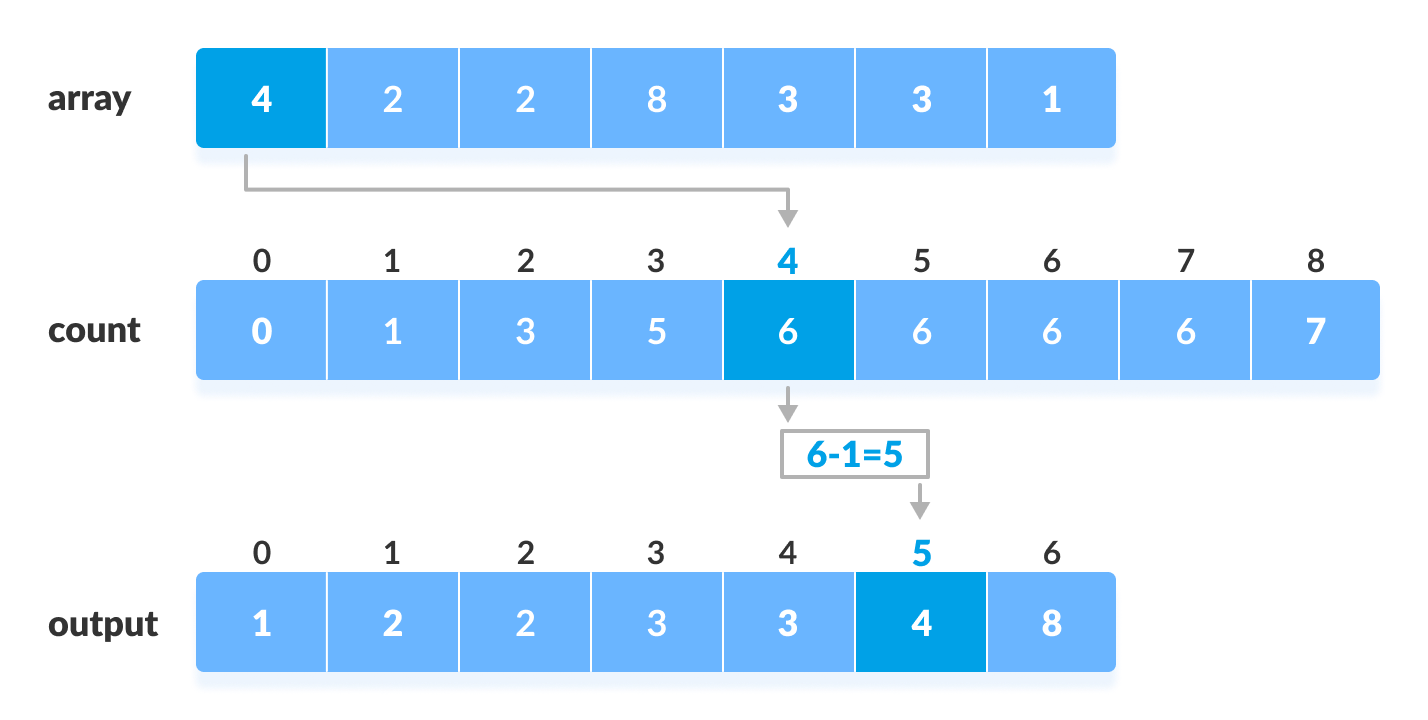 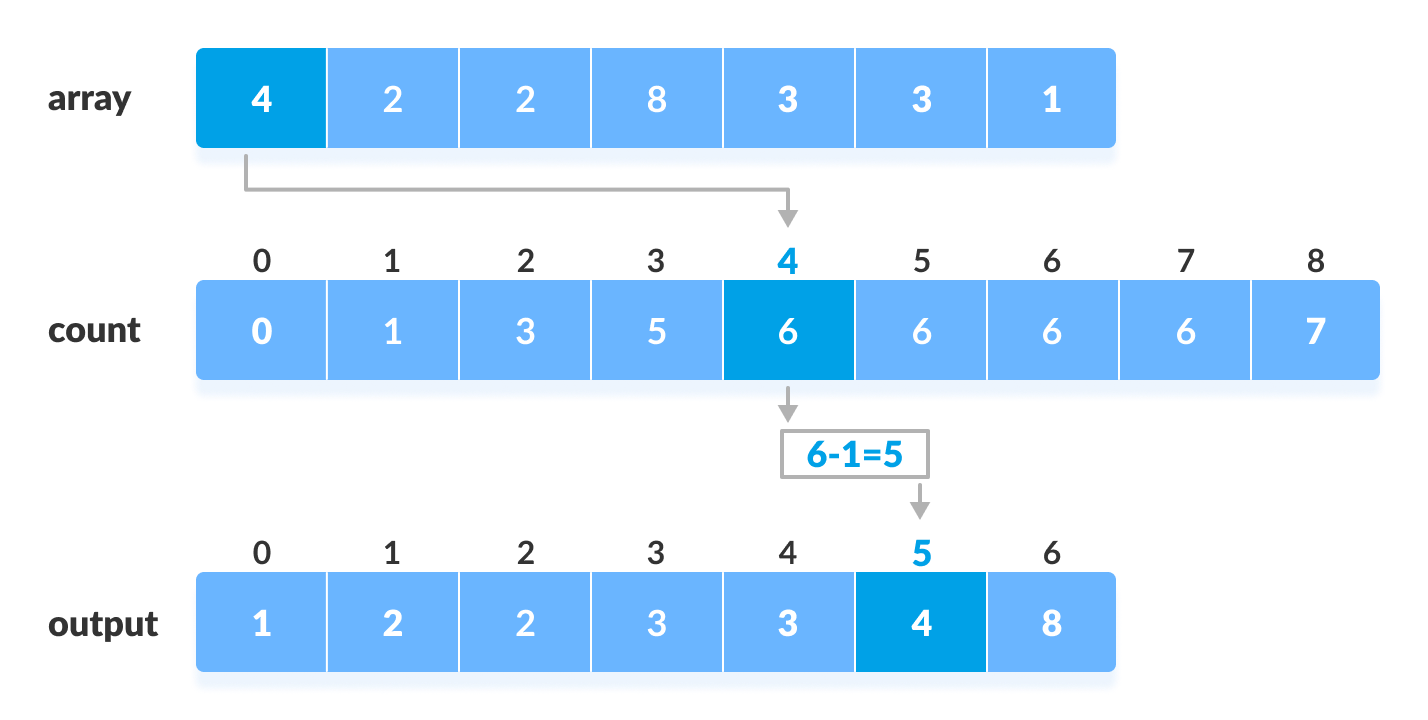

***python*** 


---



```python
def counting_sort(A):
    "Sort A assuming items have non-negative keys"
    u = 1 + max([x.key for x in A])  # Find the maximum key (O(n))
    D = [[] for i in range(u)]  # Create a direct access array of chains (O(u))
    for x in A:
        D[x.key].append(x)  # Insert items into the appropriate chain (O(n))
    i = 0
    for chain in D:
        for x in chain:  # Read out items in order (O(u))
            A[i] = x
            i += 1
```

---


Counting sort involves initializing the chains of the direct access array in O(u) time, inserting all elements in O(n) time, and subsequently scanning the direct access array to return the items in O(u) time. Consequently, this algorithm operates in O(n + u) time. Once more, when u = O(n), counting sort achieves linear time complexity, and it can handle duplicate keys.

Another implementation of counting sort counts how many items map to each key index, moving each item only once. This approach differs from the previous one, which places items into chains and then returns them to their original positions. The following implementation calculates the final index location of each item using cumulative sums.



---

***python*** 



```python
def counting_sort(A):
    "Sort A assuming items have non-negative keys"
    u = 1 + max([x.key for x in A])  # Find the maximum key (O(n))
    D = [0] * u  # Create a direct access array (O(u))
    for x in A:
        D[x.key] += 1  # Count keys (O(n))
    for k in range(1, u):
        D[k] += D[k - 1]  # Calculate cumulative sums (O(u))
    for x in list(reversed(A)):
        A[D[x.key] - 1] = x  # Move items into place (O(n))
        D[x.key] -= 1
```

---



Now, what if we need to sort keys from a larger integer range? Our approach involves breaking up integer keys into parts and sorting each part separately. To achieve this, we will require a sorting strategy capable of handling tuples, i.e., multiple parts.


---

***C++***




```C++
#include <iostream>
#include <vector>
#include <algorithm>

using namespace std;

// Define a structure for items with keys
struct Item {
    int key;
    // Additional data members if needed
};

// Counting Sort with Chains
void countingSortWithChains(vector<Item>& A) {
    int n = A.size();
    int u = 1 + max_element(A.begin(), A.end(), [](const Item& a, const Item& b) {
        return a.key < b.key;
    })->key;
    
    vector<vector<Item>> D(u);
    
    // Insert items into the appropriate chains
    for (Item& x : A) {
        D[x.key].push_back(x);
    }
    
    int i = 0;
    
    // Read out items in order
    for (vector<Item>& chain : D) {
        for (Item& x : chain) {
            A[i] = x;
            i++;
        }
    }
}

// Counting Sort with Cumulative Sums
void countingSortWithCumulativeSums(vector<Item>& A) {
    int n = A.size();
    int u = 1 + max_element(A.begin(), A.end(), [](const Item& a, const Item& b) {
        return a.key < b.key;
    })->key;
    
    vector<int> D(u, 0);
    
    // Count keys
    for (Item& x : A) {
        D[x.key]++;
    }
    
    // Calculate cumulative sums
    for (int k = 1; k < u; k++) {
        D[k] += D[k - 1];
    }
    
    vector<Item> B(n);
    
    // Move items into place
    for (int i = n - 1; i >= 0; i--) {
        B[D[A[i].key] - 1] = A[i];
        D[A[i].key]--;
    }
    
    // Copy sorted items back to A
    A = B;
}

int main() {
    // Example usage
    vector<Item> A = {{4}, {2}, {2}, {8}, {3}, {3}, {1}};
    
    // Uncomment one of the following sorting methods to use
    // countingSortWithChains(A);
    // countingSortWithCumulativeSums(A);
    
    // Print sorted items
    for (const Item& x : A) {
        cout << x.key << " ";
    }
    
    return 0;
}
```


---

### Radix Sort



Radix Sort is a powerful sorting algorithm that allows us to efficiently sort a wide range of integer sets in linear time. Its key idea involves breaking each integer into its constituent parts by utilizing powers of a chosen base, represented as sequences of digits. When these integers are non-negative and the largest value in the set is u, the number in base n will have d(log_n u) digits. We can think of these digit sequences as tuples and employ a technique known as tuple sort. Radix Sort combines tuple sorting with counting sort, creating a highly efficient sorting method.

**Here's how Radix Sort works:**

- Begin with a list of items to be sorted, denoted as A.
- Determine the base, n, which is essential for representing the integers in base n.
- Find the maximum key value, u, within the list A, which takes O(n) time.
- Calculate the value of c, the number of digits needed to represent u in base n. This is done by computing c = 1 + (log_n u / log_n n).
- Create an auxiliary list, D, where each element is an object capable of storing the item and its digit representations.
- Iterate through the list A and for each item, compute its digit sequence and store it in the corresponding D object.
- Sort the items within D, one digit at a time, starting from the least significant digit to the most significant one.
- Use counting sort to achieve this digit-wise sorting, which runs in linear time.
- Update the list A with the sorted items from D.

The key insight here is that if the largest integer in the set (u) is less than or equal to the base (n), Radix Sort runs in O(nc) time. Consequently, when c remains constant, Radix Sort achieves linear time complexity, making it an incredibly efficient sorting algorithm.

Below is a Python implementation of Radix Sort for your reference:



# <center> <div style="width: 700px;"> 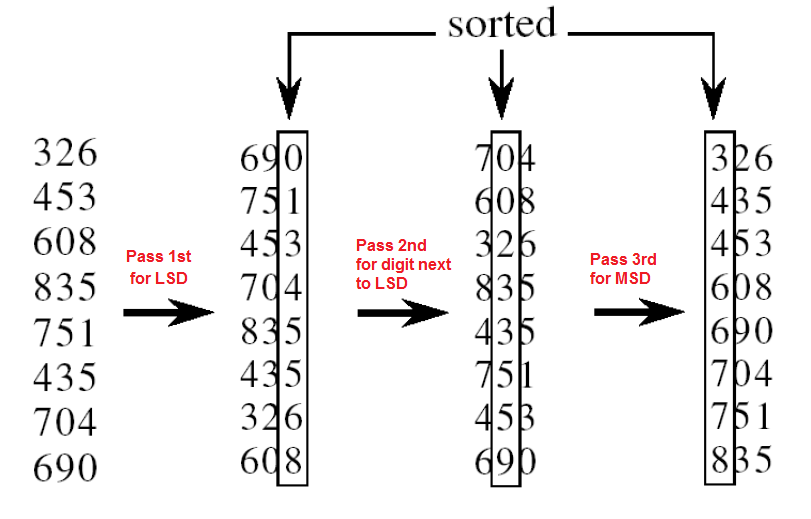

---

***python***



```python
def radix_sort(A):
    "Sort A assuming items have non-negative keys"
    n = len(A)
    u = 1 + max([x.key for x in A])  # Find maximum key (O(n))
    c = 1 + (u.bit_length() // n.bit_length())  # Calculate number of digits (O(1))
    
    class Obj: pass  # Create an auxiliary object
    
    D = [Obj() for a in A]  # Create an auxiliary list
    
    for i in range(n):  # Make digit tuples (O(nc))
        D[i].digits = []
        D[i].item = A[i]
        high = A[i].key
        for j in range(c):  # Make digit tuple (O(c))
            high, low = divmod(high, n)
            D[i].digits.append(low)
    
    for i in range(c):  # Sort each digit (O(nc))
        for j in range(n):  # Assign key i to tuples (O(n))
            D[j].key = D[j].digits[i]
        counting_sort(D)  # Sort on digit i (O(n))
    
    for i in range(n):  # Output to A (O(n))
        A[i] = D[i].item
```

---
---

***C++***












```C++
#include <iostream>
#include <vector>
#include <cmath>
#include <algorithm>

using namespace std;

// Define a structure for items with keys
struct Item {
    int key;
    // Additional data members if needed
};

// Function to perform counting sort on digits
void countingSort(vector<Item>& D, int exp) {
    int n = D.size();
    vector<Item> output(n);
    vector<int> count(10, 0);

    for (int i = 0; i < n; i++) {
        count[(D[i].key / exp) % 10]++;
    }

    for (int i = 1; i < 10; i++) {
        count[i] += count[i - 1];
    }

    for (int i = n - 1; i >= 0; i--) {
        output[count[(D[i].key / exp) % 10] - 1] = D[i];
        count[(D[i].key / exp) % 10]--;
    }

    for (int i = 0; i < n; i++) {
        D[i] = output[i];
    }
}

// Radix Sort
void radixSort(vector<Item>& A) {
    int n = A.size();
    int u = 1 + (*max_element(A.begin(), A.end(), [](const Item& a, const Item& b) {
        return a.key < b.key;
    })).key;

    int c = 1 + (int)(log2(u) / log2(n));

    // Create an auxiliary array of objects
    vector<Item> D(n);

    // Compute digit representations for each item
    for (int i = 0; i < n; i++) {
        D[i].key = A[i].key;
        D[i].key_digits = vector<int>(c);

        int high = A[i].key;
        for (int j = 0; j < c; j++) {
            int low = high % n;
            D[i].key_digits[j] = low;
            high /= n;
        }
    }

    // Perform counting sort for each digit, from least significant to most significant
    for (int i = 0; i < c; i++) {
        countingSort(D, pow(n, i));
    }

    // Copy the sorted items back to A
    for (int i = 0; i < n; i++) {
        A[i].key = D[i].key;
    }
}

int main() {
    // Example usage
    vector<Item> A = {{170}, {45}, {75}, {90}, {802}, {24}, {2}, {66}};

    // Perform Radix Sort
    radixSort(A);

    // Print sorted items
    for (const Item& x : A) {
        cout << x.key << " ";
    }

    return 0;
}
```
---

